<a href="https://colab.research.google.com/github/mariaxclarisse/Predictive-Modeling-with-Diamonds/blob/main/Predictive_Modeling_with_Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context about the dataset

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Link: https://www.kaggle.com/datasets/shivam2503/diamonds/data

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Load the Dataset

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head(10) # show first 10 rows

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

- carat (0.2-5.01): The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points.
- cut (Fair, Good, Very Good, Premium, Ideal): The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade.
- color (from J (worst) to D (best)): The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.
- clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.
- depth (43-79): It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above.
- table (43-95): It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous.
- price ($$326 - $18826): It is the price of the diamond in US dollars. It is our very target column in the dataset.
- x (0 - 10.74): Length of the diamond (in mm)
- y (0 - 58.9): Width of the diamond (in mm)
- z (0 - 31.8): Depth of the diamond (in mm)



## Exploratory Data Analysis

In [4]:
# Checking for missing values and categorical variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(inplace=True)

## Visualizations

Generating violin plot using seaborn to visualize distribution of diamond prices across different cuts.

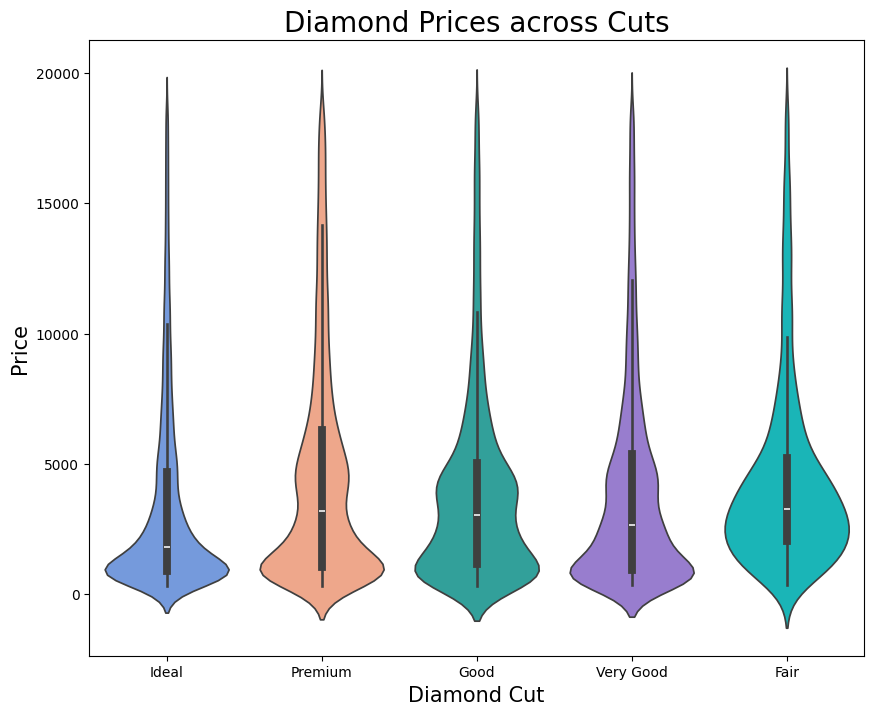

In [8]:
plt.figure(figsize=(10,8)) # figure size
cols = ["#6495ED", "#FFA07A", "#20B2AA", "#9370DB", "#00CED1"]  # different colors

ax = sns.violinplot(x="cut", y="price", data=df, palette=cols, scale="count")
ax.set_title("Diamond Prices across Cuts", fontsize=20)
ax.set_ylabel("Price", fontsize=15)
ax.set_xlabel("Diamond Cut", fontsize=15)
plt.show()

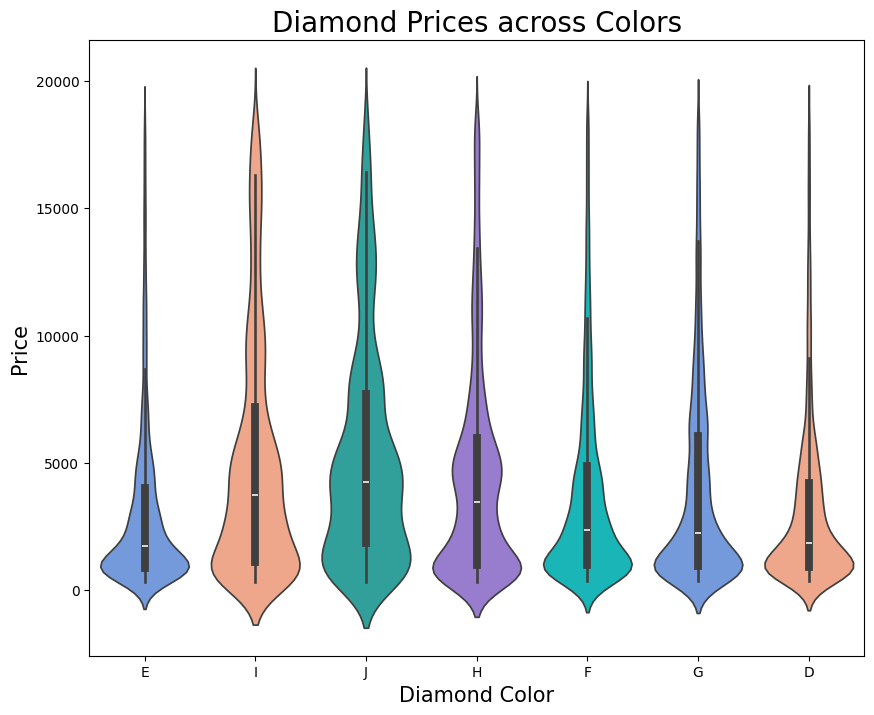

In [9]:
plt.figure(figsize=(10,8)) # figure size
cols = ["#6495ED", "#FFA07A", "#20B2AA", "#9370DB", "#00CED1"]  # different colors

ax = sns.violinplot(x="color", y="price", data=df, palette=cols, scale="count")
ax.set_title("Diamond Prices across Colors", fontsize=20)
ax.set_ylabel("Price", fontsize=15)
ax.set_xlabel("Diamond Color", fontsize=15)
plt.show()

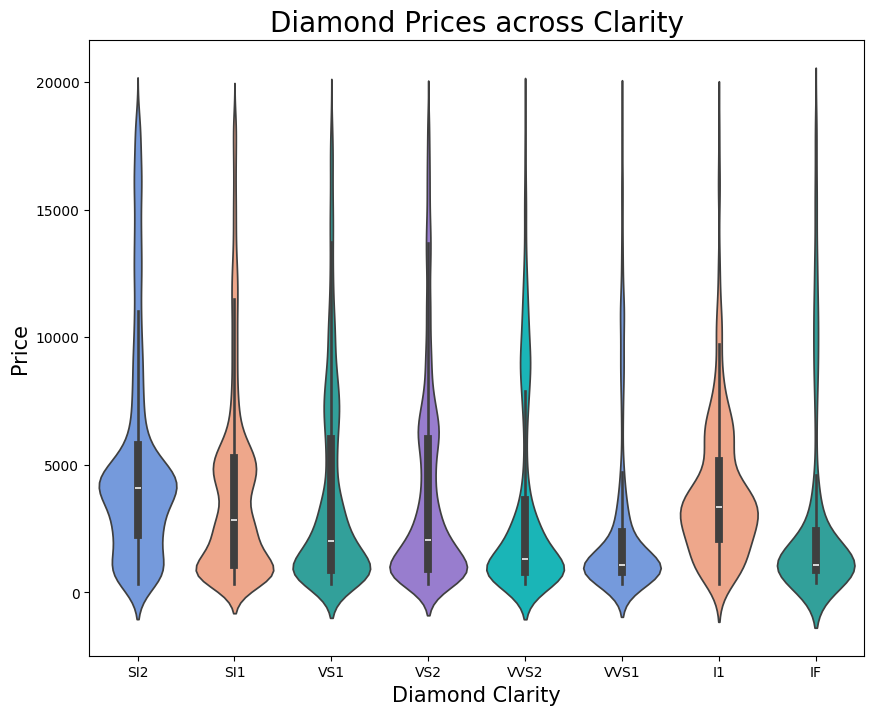

In [10]:
plt.figure(figsize=(10,8)) # figure size
cols = ["#6495ED", "#FFA07A", "#20B2AA", "#9370DB", "#00CED1"]  # different colors

ax = sns.violinplot(x="clarity", y="price", data=df, palette=cols, scale="count")
ax.set_title("Diamond Prices across Clarity", fontsize=20)
ax.set_ylabel("Price", fontsize=15)
ax.set_xlabel("Diamond Clarity", fontsize=15)
plt.show()

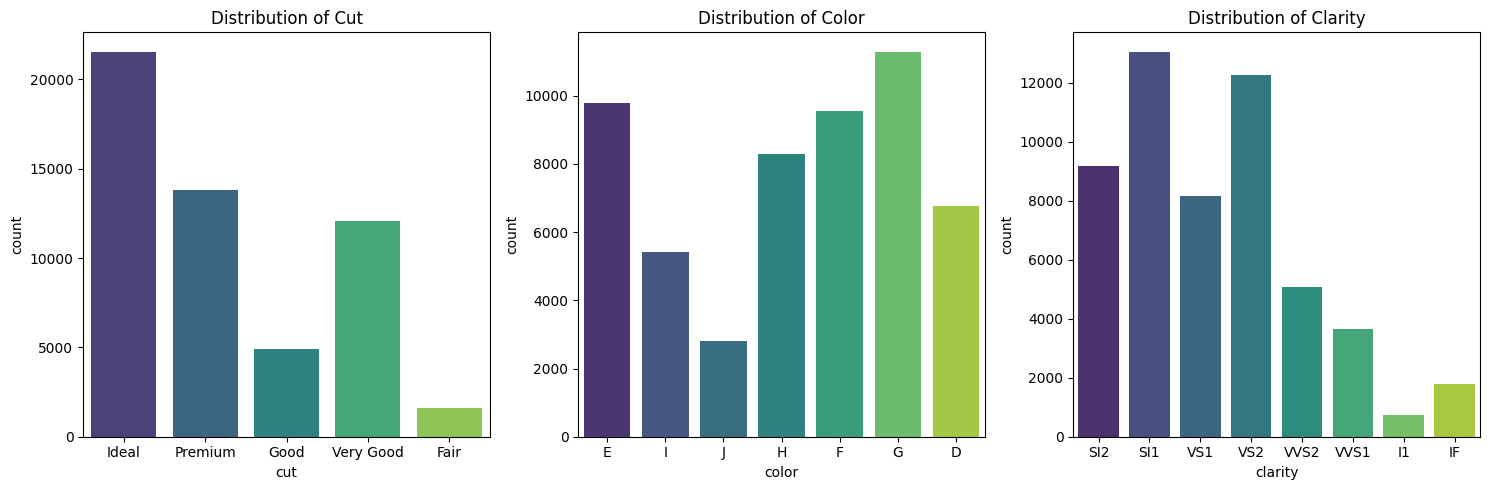

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='cut', palette='viridis')
plt.title('Distribution of Cut')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='color', palette='viridis')
plt.title('Distribution of Color')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='clarity', palette='viridis')
plt.title('Distribution of Clarity')

plt.tight_layout()
plt.show()

#### Carat

- Histogram of carat values.
- Box plot of carat vs. price to see how carat affects diamond prices.

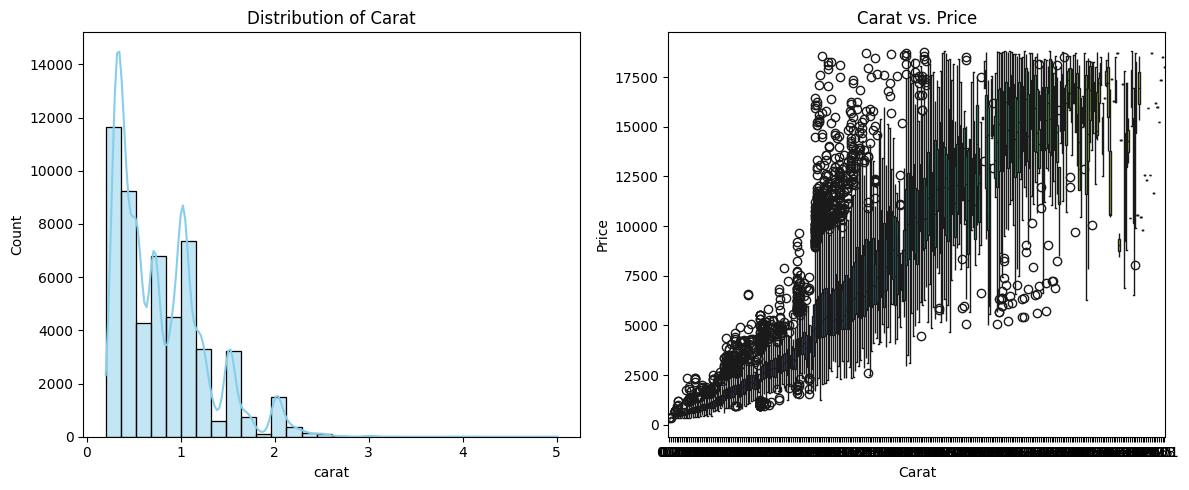

In [14]:
plt.figure(figsize=(12, 5))

# Histogram of carat
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='carat', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Carat')

# Box plot of carat vs. price
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='carat', y='price', palette='viridis')
plt.title('Carat vs. Price')
plt.ylabel('Price')
plt.xlabel('Carat')

plt.tight_layout()
plt.show()

#### Cut

- Count plot to visualize the distribution of different cut categories.
- Box plot of cut vs. price to see how cut quality affects diamond prices.

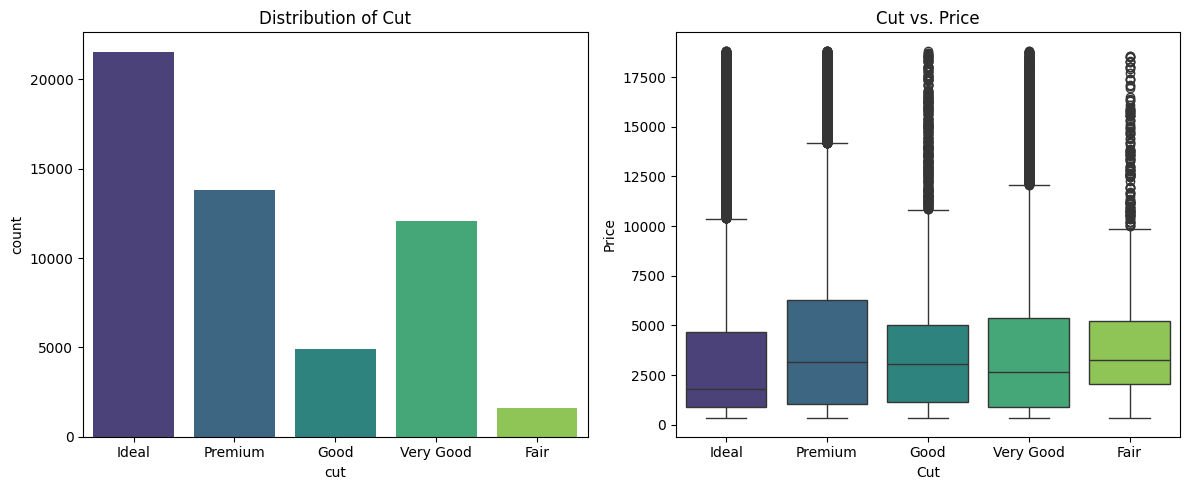

In [15]:
plt.figure(figsize=(12, 5))

# Count plot of cut
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='cut', palette='viridis')
plt.title('Distribution of Cut')

# Box plot of cut vs. price
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='cut', y='price', palette='viridis')
plt.title('Cut vs. Price')
plt.ylabel('Price')
plt.xlabel('Cut')

plt.tight_layout()
plt.show()

#### Color

- Count plot to visualize the distribution of different color categories.
- Box plot of color vs. price to see how cut quality affects diamond prices.

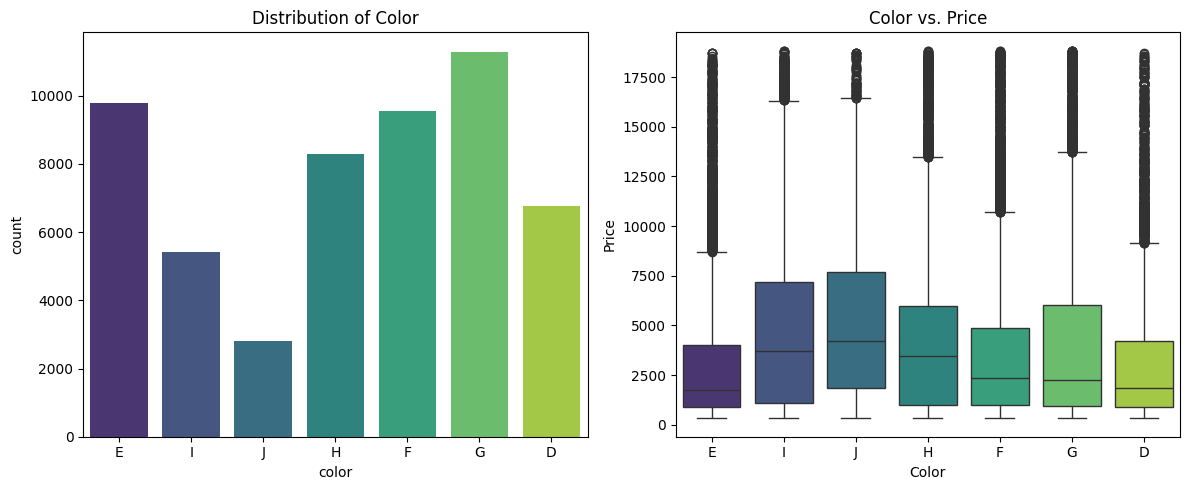

In [17]:
plt.figure(figsize=(12, 5))

# Count plot of color
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='color', palette='viridis')
plt.title('Distribution of Color')

# Box plot of color vs. price
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='color', y='price', palette='viridis')
plt.title('Color vs. Price')
plt.ylabel('Price')
plt.xlabel('Color')

plt.tight_layout()
plt.show()

#### Clarity

- Count plot to visualize the distribution of different clarity categories.
- Box plot of clarity vs. price to see how cut quality affects diamond prices.

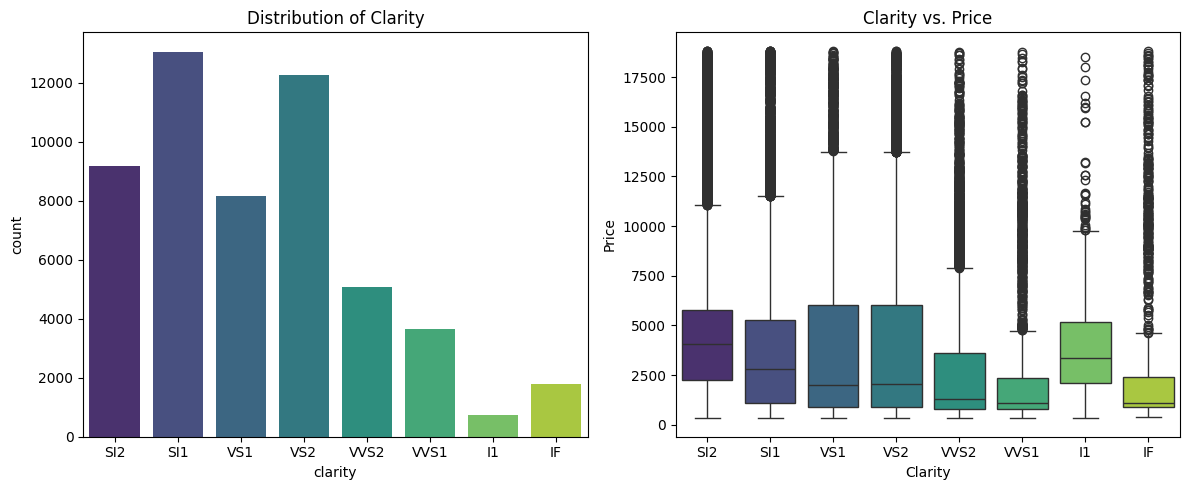

In [18]:
plt.figure(figsize=(12, 5))

# Count plot of clarity
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='clarity', palette='viridis')
plt.title('Distribution of Clarity')

# Box plot of clarity vs. price
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='clarity', y='price', palette='viridis')
plt.title('Clarity vs. Price')
plt.ylabel('Price')
plt.xlabel('Clarity')

plt.tight_layout()
plt.show()

#### Table and Depth

depth vs. price

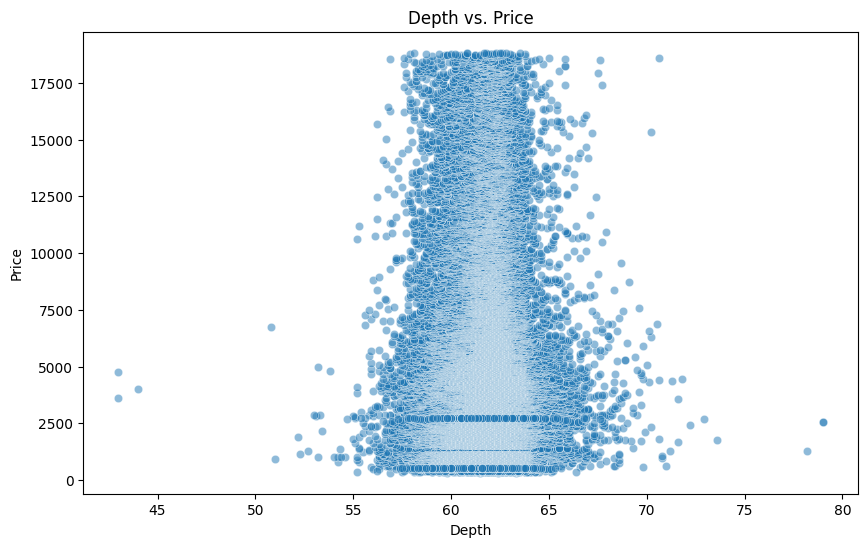

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='depth', y='price', alpha=0.5)
plt.title('Depth vs. Price')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

table vs. price

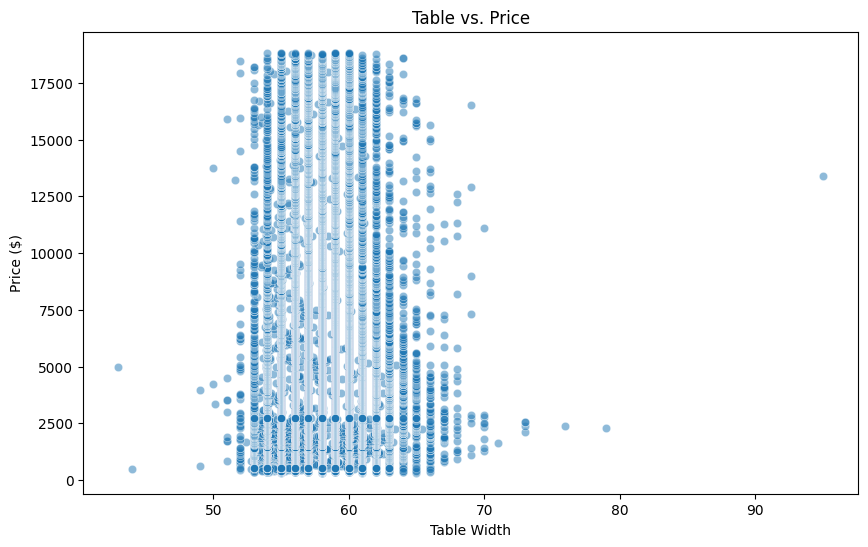

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='table', y='price', alpha=0.5)
plt.title('Table vs. Price')
plt.xlabel('Table Width')
plt.ylabel('Price ($)')
plt.show()

#### x,y,z

Length, Width, and Depth Distribution:

Plot histograms to visualize the distributions of the length, width, and depth of diamonds.

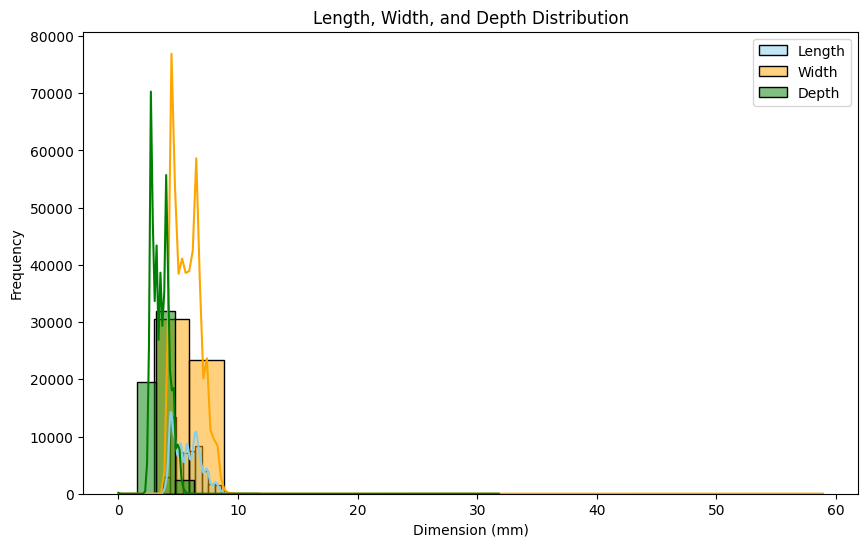

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['x'], bins=20, kde=True, color='skyblue', label='Length')
sns.histplot(df['y'], bins=20, kde=True, color='orange', label='Width')
sns.histplot(df['z'], bins=20, kde=True, color='green', label='Depth')
plt.title('Length, Width, and Depth Distribution')
plt.xlabel('Dimension (mm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()